# Project: Investigating the FBI Gun Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The dataset that I have chosen to investigate is the FBI Gun Dataset. The FBI Gun Dataset provides data from gun ownership and permits from all States in the United States of America and also American territories such as Guama and Puerto Rico. The questions I will be exploring in this dataset are "Which States have had the highest growth in gun registrations?" and "What is the overall trend of gun purchases?"

In [1]:
#Firstly, I will import the packages I need for this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling

### Cleaning Data for Gun Data
Before I could start, I noticed that the gun data I have downloaded is in Excel Workbook format. I changed the format to csv file in order to read it in Pandas. 

In [2]:
df_gun = pd.read_csv("gun_data.csv")

#using the .head() I was able to see that there are 27 columns but only shows 5 rows.
df_gun.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [3]:
#to visualise how many rows in total there are, .shape can be used
df_gun.shape #shows that there are 12485 months recorded in this dataset

(12485, 27)

### Data Cleaning 
The gun data needs to be cleaned. Upon inspection using .info(), the only columns that do not contain null values are month, state and totals. Therefore, the NaN values would need to be filled in or eliminated from the dataset. In addition, the datatypes of multiples and totals are integers whereas, the other columns which contain digits have the float datatype. In order to keep the datatypes consistent, int64 were changed to float64. 

In [4]:
df_gun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12461 non-null  float64
 3   permit_recheck             1100 non-null   float64
 4   handgun                    12465 non-null  float64
 5   long_gun                   12466 non-null  float64
 6   other                      5500 non-null   float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12462 non-null  float64
 9   prepawn_handgun            10542 non-null  float64
 10  prepawn_long_gun           10540 non-null  float64
 11  prepawn_other              5115 non-null   float64
 12  redemption_handgun         10545 non-null  float64
 13  redemption_long_gun        10544 non-null  flo

### Data Cleaning: Changing Datatypes

In [5]:
#change month to datetime datatype
month_datetime = df_gun["month"]
series = pd.to_datetime(month_datetime)

#only have the month and year in the date. 
series.apply(lambda x: str(x.year) + "-" + str(x.month)) 

0         2017-9
1         2017-9
2         2017-9
3         2017-9
4         2017-9
          ...   
12480    1998-11
12481    1998-11
12482    1998-11
12483    1998-11
12484    1998-11
Name: month, Length: 12485, dtype: object

In [6]:
#change multiple and totals to floats 

df_gun["multiple"] = df_gun.multiple.astype(float)
df_gun["totals"] = df_gun.totals.astype(float)

df_gun.info() #to check if the datatypes have been converted 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12461 non-null  float64
 3   permit_recheck             1100 non-null   float64
 4   handgun                    12465 non-null  float64
 5   long_gun                   12466 non-null  float64
 6   other                      5500 non-null   float64
 7   multiple                   12485 non-null  float64
 8   admin                      12462 non-null  float64
 9   prepawn_handgun            10542 non-null  float64
 10  prepawn_long_gun           10540 non-null  float64
 11  prepawn_other              5115 non-null   float64
 12  redemption_handgun         10545 non-null  float64
 13  redemption_long_gun        10544 non-null  flo

### Data Cleaning: Sorting out NaN Values
Comparisons need to be made to ensure that filling the NaN values with their mean values do not change the overall trend of the data. This can be done by looking at the histograms before and after data alteration. 

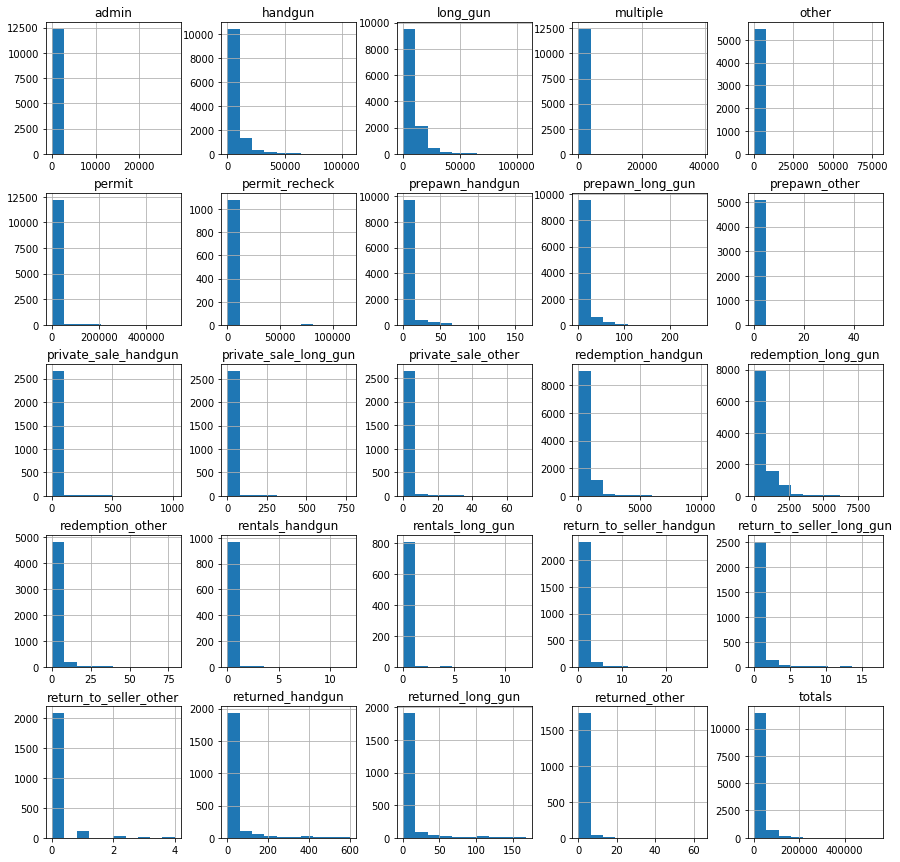

In [7]:
df_gun.hist(figsize=(15,15));

In [8]:
df_gun.fillna(df_gun.mean(), inplace=True) #find the mean of each column and fill it in. So there are no NaN values 
df_gun.isnull().sum() #check that there are no NaN values

month                        0
state                        0
permit                       0
permit_recheck               0
handgun                      0
long_gun                     0
other                        0
multiple                     0
admin                        0
prepawn_handgun              0
prepawn_long_gun             0
prepawn_other                0
redemption_handgun           0
redemption_long_gun          0
redemption_other             0
returned_handgun             0
returned_long_gun            0
returned_other               0
rentals_handgun              0
rentals_long_gun             0
private_sale_handgun         0
private_sale_long_gun        0
private_sale_other           0
return_to_seller_handgun     0
return_to_seller_long_gun    0
return_to_seller_other       0
totals                       0
dtype: int64

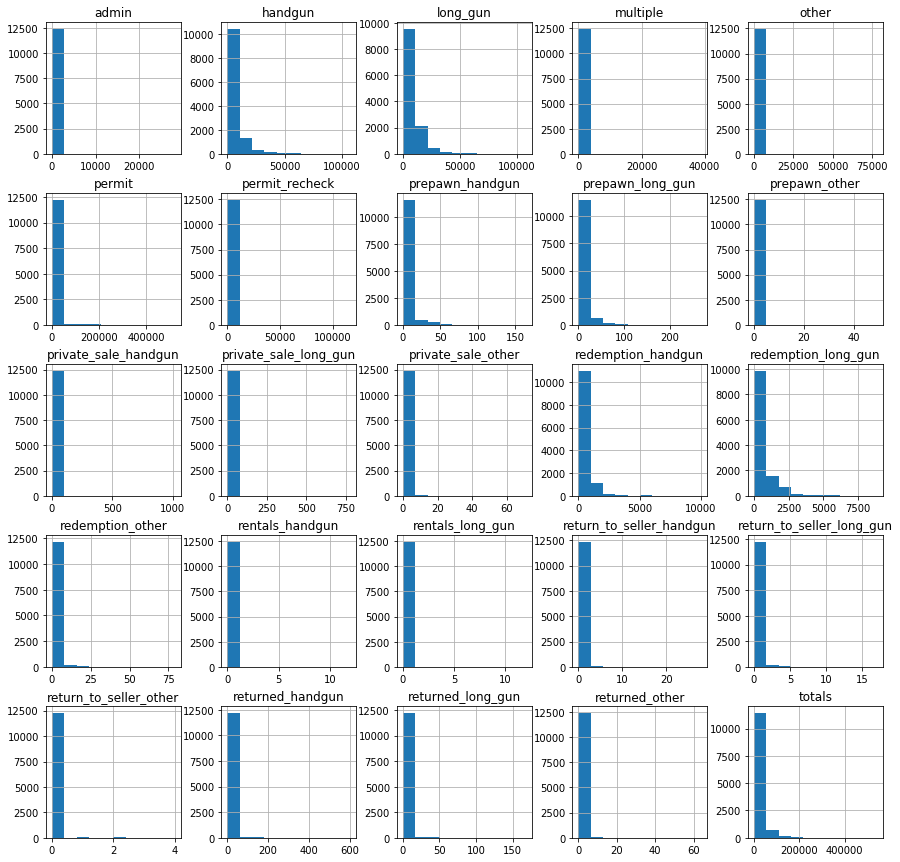

In [9]:
#Histogram of the new gun dataset with the NaN values filled in with the mean
df_gun.hist(figsize=(15,15)); 
#Looks like the histogram that has the NaN filled in doesnt create a massive impact on the trends from the original data. 
#Therefore, this method is justified. 

<a id='eda'></a>
## Exploratory Data Analysis
### Which States Have had the Highest Growth in Gun Registrations?
To look at the highest growth on gun registrations, new dataframes were made to include only the most recent date recorded (2017-09) and the oldest dataframe (1998-11). Only the permit columns were needed so columns after permit were dropped in both dataframes. The permit columns in both dataframes were renamed in order to make it easier to distinguish once both dataframes were merged. Both permit columns were subtracted to generate the growth permits and the maximum value was taken to show which State had the highest growth in gun registrations. 

In [10]:
#look at the permit column from 1998-11 to 2017-09. Make a new column 
df_np = df_gun[df_gun["month"] == "2017-09"]
df_op = df_gun[df_gun["month"] == "1998-11"]

#drop all columns after permit in 2017 data 
col1 = df_np.loc[:,"permit_recheck":]
df_np.drop(col1, axis = 1,inplace = True)
df_np.drop("month", axis = 1, inplace = True)

#rename permit to permit_2017
df_np.rename(columns = {"permit":"permit_2017"},inplace = True)

#drop all columns after permit in 1998 data 
col2 = df_op.loc[:,"permit_recheck":]
df_op.drop(col2, axis = 1,inplace = True)
df_op.drop("month", axis = 1, inplace = True)
df_op.drop("state", axis = 1, inplace = True)

#reset index in 1998 data, if not the merged data will be NaN for index = 0, etc. 
df_op = df_op.reset_index(drop=True)

#rename permit to permit_1998
df_op.rename(columns = {"permit":"permit_1998"},inplace = True)

#merge the two dataframes together 
df_gun_onp = pd.concat([df_np,df_op],axis = 1, join = "outer")

#Calculate the gun growth permit from 1998 to 2017
df_gun_onp["Gun Growth Permits"] = df_gun_onp["permit_2017"]-df_gun_onp["permit_1998"]

df_gun_onp.head(20)

C:\Users\Chloe\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\Chloe\anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,state,permit_2017,permit_1998,Gun Growth Permits
0,Alabama,16717.0,0.0,16717.0
1,Alaska,209.0,4.0,205.0
2,Arizona,5069.0,0.0,5069.0
3,Arkansas,2935.0,0.0,2935.0
4,California,57839.0,434.0,57405.0
5,Colorado,4356.0,0.0,4356.0
6,Connecticut,4343.0,17.0,4326.0
7,Delaware,275.0,0.0,275.0
8,District of Columbia,1.0,0.0,1.0
9,Florida,10784.0,0.0,10784.0


In [11]:
#to see the highest growth 
df_gun_onp["Gun Growth Permits"].max() #this shows that the number of recorded permits in 2017 and growth permits was 378384
#df_gun_onp[df_gun_onp["Gun Growth Permits"]=="378384.0"] #got a warning


df_gun_onp.loc[df_gun_onp["Gun Growth Permits"].isin(["378384.0"]), "Gun Growth Permits"]
#looking at index 18, the state that as the most growing permits is Kentucky

18    378384.0
Name: Gun Growth Permits, dtype: float64

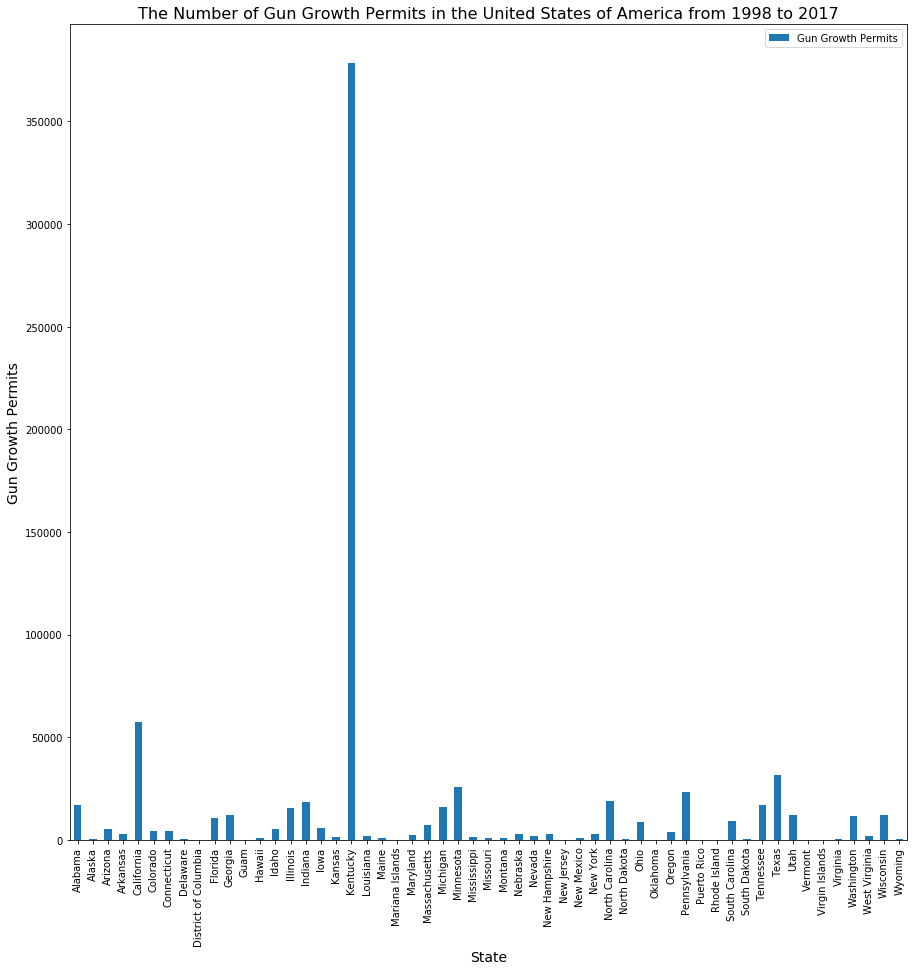

In [12]:
#can also use a bar char to see which states have the highest growth in gun registrations

df_gun_onp.plot(x="state",y="Gun Growth Permits",kind="bar",figsize=(15,15))
plt.title("The Number of Gun Growth Permits in the United States of America from 1998 to 2017", fontsize=16)
plt.xlabel("State", fontsize=14)
plt.ylabel("Gun Growth Permits", fontsize=14);

### What is the Overall Trend of Gun Purchases?
To look at overall trend of gun purchases, the sum of each category in each State from 1998 to 2017. Some categories were split to keep the graphs simple. Categories such as the total number of guns in each State, total number of pre-pawn guns purchased, total number of privately purchased guns, and the number of redeemed guns were explored. 

In [17]:
#What are the maximum values for each category?
df_popgun = df_gun.groupby("state").sum()
df_popgun.max()

permit                       2.492678e+07
permit_recheck               1.382672e+06
handgun                      6.493832e+06
long_gun                     9.383642e+06
other                        3.884149e+05
multiple                     3.679620e+05
admin                        4.129160e+05
prepawn_handgun              8.881981e+03
prepawn_long_gun             1.001020e+04
prepawn_other                1.071892e+02
redemption_handgun           8.536880e+05
redemption_long_gun          1.003548e+06
redemption_other             2.398243e+03
returned_handgun             2.070858e+04
returned_long_gun            5.106824e+03
returned_other               1.017344e+03
rentals_handgun              5.504444e+01
rentals_long_gun             7.650182e+01
private_sale_handgun         1.906967e+04
private_sale_long_gun        1.528171e+04
private_sale_other           1.113342e+03
return_to_seller_handgun     3.221677e+02
return_to_seller_long_gun    3.792018e+02
return_to_seller_other       5.971

In [18]:
#What State has the maximum values for each category?
df_popgun.idxmax()

permit                           Kentucky
permit_recheck                   Illinois
handgun                             Texas
long_gun                     Pennsylvania
other                          California
multiple                            Texas
admin                             Georgia
prepawn_handgun                     Texas
prepawn_long_gun                    Texas
prepawn_other                       Texas
redemption_handgun                  Texas
redemption_long_gun                 Texas
redemption_other                    Texas
returned_handgun             Pennsylvania
returned_long_gun              Washington
returned_other                       Utah
rentals_handgun                  New York
rentals_long_gun                 New York
private_sale_handgun           Washington
private_sale_long_gun          Washington
private_sale_other             Washington
return_to_seller_handgun         New York
return_to_seller_long_gun        New York
return_to_seller_other           M

In [19]:
#What are the maximum values for each category?
df_popgun.idxmin()

permit                                       Guam
permit_recheck                         California
handgun                                    Hawaii
long_gun                                   Hawaii
other                        District of Columbia
multiple                                   Hawaii
admin                                        Guam
prepawn_handgun                        California
prepawn_long_gun                       California
prepawn_other                          California
redemption_handgun                     New Jersey
redemption_long_gun          District of Columbia
redemption_other                         Colorado
returned_handgun                          Alabama
returned_long_gun                         Alabama
returned_other                            Alabama
rentals_handgun                            Alaska
rentals_long_gun                          Alabama
private_sale_handgun                   California
private_sale_long_gun                  California


In [20]:
#What State has the minimum values for each category?
df_popgun.idxmin()

permit                                       Guam
permit_recheck                         California
handgun                                    Hawaii
long_gun                                   Hawaii
other                        District of Columbia
multiple                                   Hawaii
admin                                        Guam
prepawn_handgun                        California
prepawn_long_gun                       California
prepawn_other                          California
redemption_handgun                     New Jersey
redemption_long_gun          District of Columbia
redemption_other                         Colorado
returned_handgun                          Alabama
returned_long_gun                         Alabama
returned_other                            Alabama
rentals_handgun                            Alaska
rentals_long_gun                          Alabama
private_sale_handgun                   California
private_sale_long_gun                  California


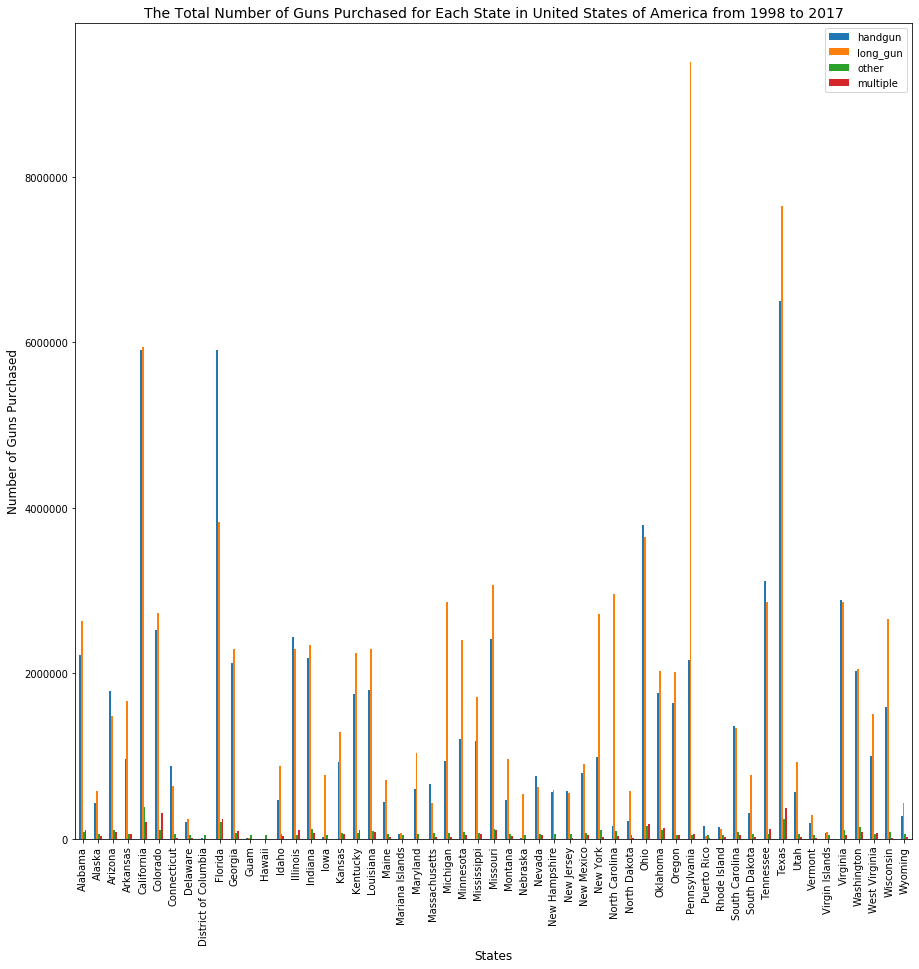

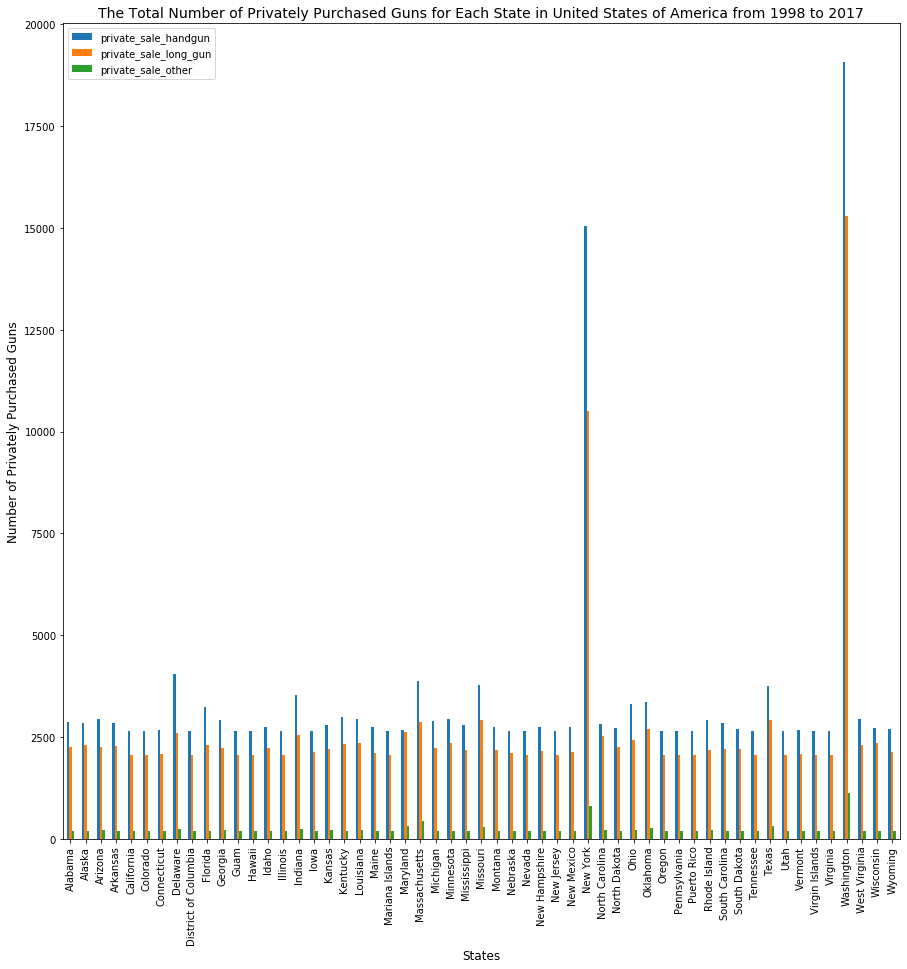

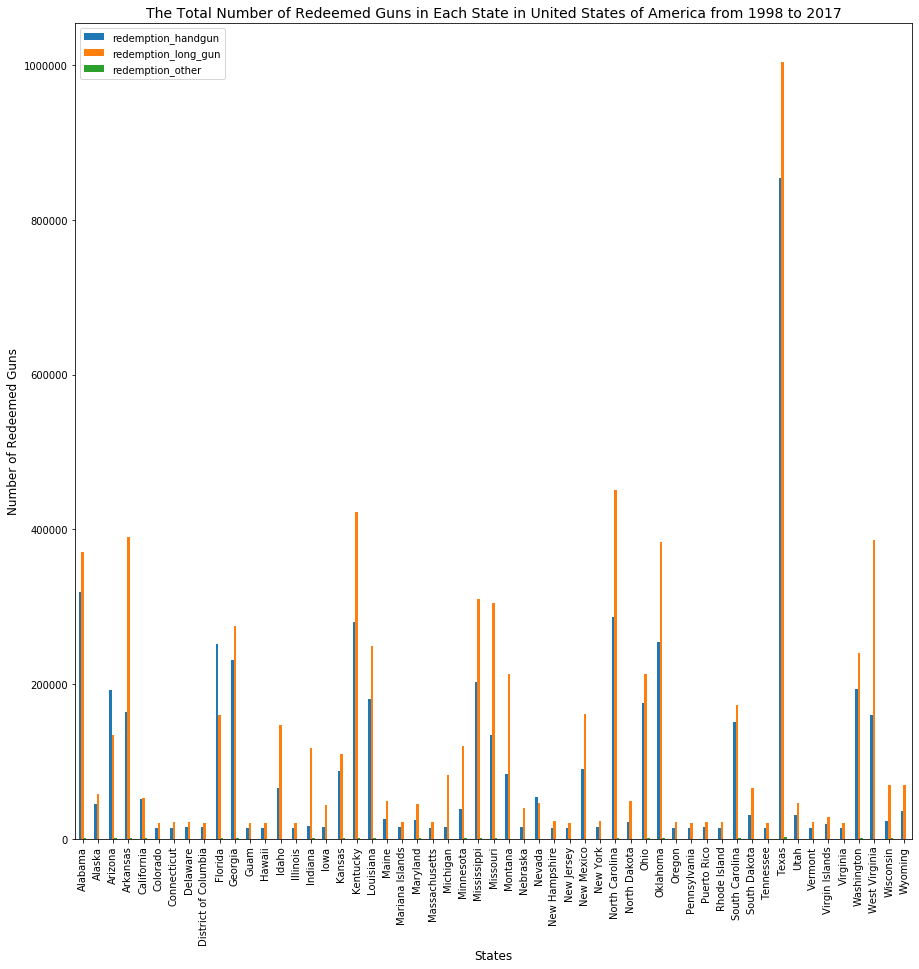

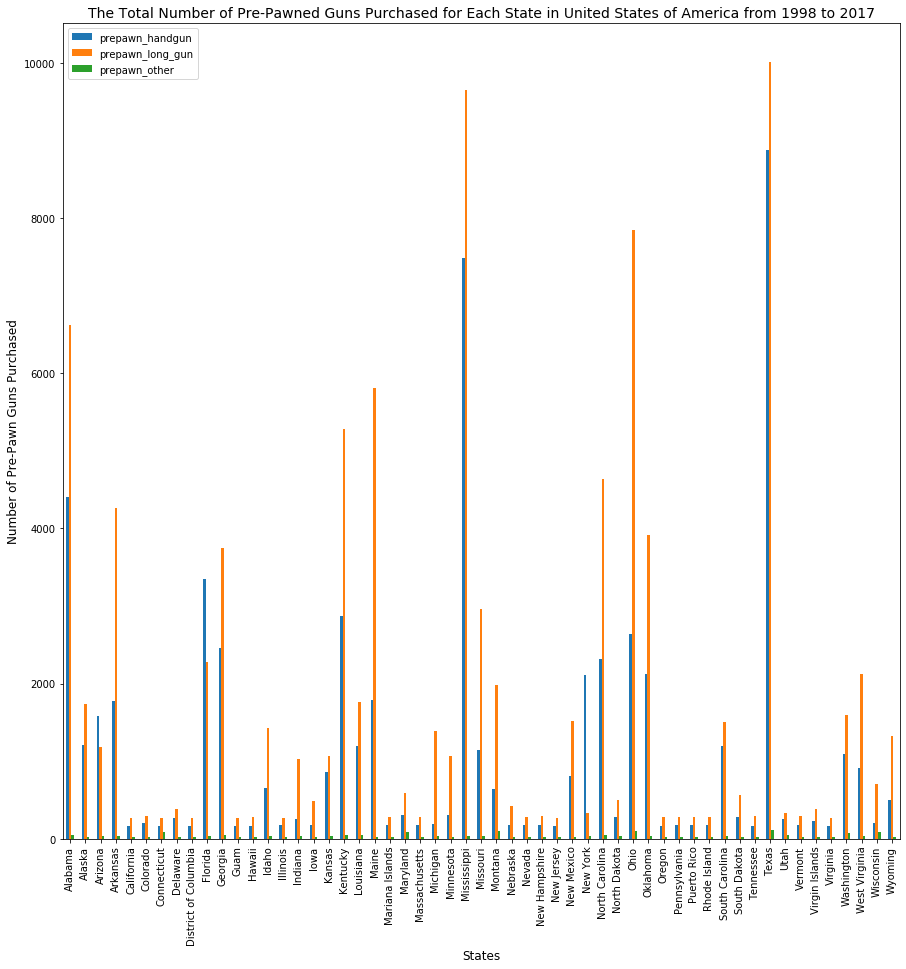

In [24]:
def makegraph(drop,yaxis,title):
    df_popgun = df_gun.groupby("state").sum()
    df_popgun1 = df_popgun.drop(drop,axis = 1)
    df_popgun1.plot.bar(figsize=(15,15))
    plt.xlabel("States",fontsize=12)
    plt.ylabel(yaxis,fontsize=12)
    plt.title(title,fontsize=14);

#What is the total number of guns purchased for each state in USA from 1998 to 2017?
#drop the columns that don't relate to gun purchases
makegraph(["permit","permit_recheck","admin","redemption_handgun","redemption_long_gun",
           "redemption_other","returned_handgun","returned_long_gun","returned_other",
           "return_to_seller_handgun","return_to_seller_long_gun","return_to_seller_other",
           "totals","prepawn_handgun","prepawn_long_gun","prepawn_other","rentals_handgun",
           "rentals_long_gun","private_sale_handgun","private_sale_long_gun","private_sale_other"],
         "Number of Guns Purchased","The Total Number of Guns Purchased for Each State in United States of America from 1998 to 2017")

#How many guns were privately bought in each state?
#drop the columns that don't relate to privately purchased guns 
makegraph(["permit","permit_recheck","admin","handgun","long_gun","other","multiple",
           "returned_handgun","returned_long_gun","returned_other","return_to_seller_handgun",
           "return_to_seller_long_gun","return_to_seller_other","prepawn_handgun","prepawn_long_gun",
           "prepawn_other","totals","rentals_handgun","rentals_long_gun","redemption_handgun","redemption_long_gun",
           "redemption_other"],"Number of Privately Purchased Guns","The Total Number of Privately Purchased Guns for Each State in United States of America from 1998 to 2017")

#How many guns were redeemed in each state?
#drop columns that don't relate to redeemed guns
makegraph(["permit","permit_recheck","admin","handgun","long_gun","other","multiple",
           "returned_handgun","returned_long_gun","returned_other","return_to_seller_handgun",
           "return_to_seller_long_gun","return_to_seller_other","prepawn_handgun","prepawn_long_gun",
           "prepawn_other","totals","rentals_handgun","rentals_long_gun","private_sale_handgun",
           "private_sale_long_gun","private_sale_other"],"Number of Redeemed Guns","The Total Number of Redeemed Guns in Each State in United States of America from 1998 to 2017")

#How many guns were purchased from pawn shops in each state?
#drop columns that don't relate to pre-pawned gun purchases
makegraph(["permit","permit_recheck","admin","handgun","long_gun","other","multiple",
           "returned_handgun","returned_long_gun","returned_other","return_to_seller_handgun",
           "return_to_seller_long_gun","return_to_seller_other","redemption_handgun",
           "redemption_long_gun","redemption_other","totals","rentals_handgun","rentals_long_gun",
           "private_sale_handgun","private_sale_long_gun","private_sale_other"],"Number of Pre-Pawn Guns Purchased",
         "The Total Number of Pre-Pawned Guns Purchased for Each State in United States of America from 1998 to 2017")


### Conclusions
The number of growth permits were the highest in Kentucky with 37,000 permits being issued. This is followed by California then Texas, with over 5,000 and under 5,000, respectively. Texas has the most hand gun purchases, and they own multiple guns, they are the State that buys pre-pawn guns the most and also undergoes the most redemptions compared to other States. New York is the State that has the most hand gun and long gun rentals, also they return hand and long guns to the seller more than any other State. There are no permits issued in Guam, this may be because they have a lack of records or people are owning guns illegally. Hawaii has the lowest amount of hand guns, long guns, and multiple guns. California has the lowest number of pre-pawned guns, private sales of guns, and returned to the seller. 
To look into more detail, States were compared in terms of redeemed guns, privately purchased guns, and pre-pawned guns.  For the majority of all States, long guns were more popular than handguns and other guns. Only a small fraction of people in the United States have multiple guns. There are a few exceptions where purchasing a handgun was more popular which includes Florida, Arizona, Ohio, Tennessee. For private gun selling, Washington and New York had the most sold handguns around 2,000 and 1,500 handguns, respectively. The majority of redeemed guns in each State were long guns which is expected because the most popular guns that have been purchased were long guns. For pre-pawn guns, the majority of the guns in each State were long guns were Texas and Mississippi were close to 1,000 purchases.  

To gather more information with gun statistics, it would have been great to know why long guns were more popular than hand guns. Are guns in the United States of America used for hunting? Is it mostly used for protection and long guns are more threatening to invaders? Who buys guns in general? What is their race, age, and educational backgrounds? Some permits were recorded as 0 in States such as Guama for example, does this mean that they have guns illegally or do they not have the means to record this data? These questions could've been answered but there were limited data that could provide us with these answers.